<a href="https://colab.research.google.com/github/LuisOrtizVega/Student-Planner/blob/main/MindSpark_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MindSpark AI setup With Gemini

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

# MindSpark List models

In [ ]:
#Calling list models
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

In [ ]:
#Generate text inputs
model = genai.GenerativeModel('gemini-pro')

In [ ]:
#Response time
%%time
response = model.generate_content("Make a educational quiz with a 6th grade math textbook?")

In [ ]:
#Markdown
to_markdown(response.text)

In [ ]:
#Response Feedback
response.prompt_feedback

In [ ]:
response.candidates

In [ ]:
%%time
response = model.generate_content("Make a educational quiz with a 6th grade math textbook?", stream=True)

CPU times: user 111 ms, sys: 4.47 ms, total: 116 ms
Wall time: 5.68 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

**6th Grade Math Textbook Quiz**

**Instructions:** Answer the following questions
________________________________________________________________________________
 based on the material covered in your 6th grade math textbook.

**Questions:**

1. Find the mean of the following numbers: 12
________________________________________________________________________________
, 15, 18, 20, 22
2. Solve for x in the equation: 5x + 10 = 50
3. Find the perimeter of a rectangle with a length of 10 cm and a width of 5 cm.
4
________________________________________________________________________________
. Calculate the area of a triangle with a base of 8 cm and a height of 6 cm.
5. Convert 1.5 meters to centimeters.
6. What is the slope of the line that passes through the points (2, 5) and (6, 12)?
7. Find the volume of a cube with a side length of 5 cm.
8. Solve the inequality: x > -5
9. Graph the line y = 2x + 1.
10. Calculate the circumference of a circle with a radius of 4 cm.

**Answer
_______

In [ ]:
response = model.generate_content("Ask 5 questions from this quiz?", stream=True)

In [ ]:
response.prompt_feedback

In [ ]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

# MindSpark Chat interaction

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [ ]:
response = chat.send_message("Make a game with 10 questions from a 6th grade math textbook.")
to_markdown(response.text)

> **6th Grade Math Textbook Trivia Game**
> 
> **Questions:**
> 
> 1. What is the value of x in the equation 2x + 5 = 15?
> 2. What is the area of a rectangle with a length of 10 cm and a width of 5 cm?
> 3. What is the volume of a cube with a side length of 3 cm?
> 4. What is the slope of the line that passes through the points (2, 3) and (5, 7)?
> 5. What is the perimeter of a circle with a radius of 5 cm?
> 6. What is the mean of the following set of numbers: 5, 8, 10, 12, 15?
> 7. What is the probability of rolling a 6 on a standard six-sided die?
> 8. What is the surface area of a sphere with a radius of 4 cm?
> 9. What is the value of 3^4?
> 10. What is the quotient of 120 divided by 15?
> 
> **Answers:**
> 
> 1. 5
> 2. 50 cm²
> 3. 27 cm³
> 4. 2/3
> 5. 10π cm
> 6. 10
> 7. 1/6
> 8. 50.24 cm²
> 9. 81
> 10. 8

In [ ]:
chat.history

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a middle schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

**Detailed Explanation of Game for Middle Schooler:**

**Game:** 6
________________________________________________________________________________
th Grade Math Textbook Trivia Game

**Objective:** To test your knowledge of 6th grade math concepts.

**Rules:**

1. There are 
________________________________________________________________________________
10 questions in total.
2. Each question is worth 1 point.
3. You have unlimited time to answer each question.
4. You can use a calculator if you need to.

**Questions:**

1. **What is the value of x in the equation 2x + 
________________________________________________________________________________
5 = 15?**
   - Imagine you have two boxes of cookies, each with x cookies inside. You also have 5 extra cookies. If you put all the cookies together, you have 15 cookies. So, how many cookies are in each box? To find out, we need to solve the equation 2x + 5 = 15. We can do this by subtracting 5 from both sides of the equation, which give

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Make a game with 10 questions from a 6th grade math textbook."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> **Math Trivia Game for 6th Graders**
> 
> **Questions:**
> 
> 1. What is the value of 1/2 + 2/3?
> 2. Simplify the expression: 2x + 3x - 5
> 3. Solve for x: 2(x - 3) = 10
> 4. Find the area of a rectangle with a length of 5 cm and a width of 3 cm.
> 5. Convert 12 inches to feet.
> 6. What is the perimeter of a square with a side length of 4 cm?
> 7. Find the volume of a cube with an edge length of 3 cm.
> 8. Simplify the fraction 12/18.
> 9. Solve for y: y - 5 = 10
> 10. Find the mean of the following numbers: 12, 15, 18, 21, 24
> 
> **Answers:**
> 
> 1. 7/6
> 2. 5x - 5
> 3. x = 8
> 4. 15 cm²
> 5. 1 foot
> 6. 16 cm
> 7. 27 cm³
> 8. 2/3
> 9. y = 15
> 10. 18

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a middle school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> **Math Trivia Game for Middle School Students**
> 
> **Instructions:**
> 
> 1. Read each question carefully.
> 2. Write your answer on a piece of paper.
> 3. Check your answers against the answer key at the end.
> 
> **Questions:**
> 
> 1. **Fractions:** What is the value of 1/2 + 2/3?
>    - To add fractions with different denominators, find a common denominator. In this case, the common denominator is 6.
>    - Rewrite the fractions with the common denominator: 1/2 = 3/6 and 2/3 = 4/6.
>    - Add the numerators: 3/6 + 4/6 = 7/6.
>    - Therefore, the value of 1/2 + 2/3 is 7/6.
> 
> 2. **Algebra:** Simplify the expression: 2x + 3x - 5
>    - Combine like terms, which are terms with the same variable and exponent.
>    - In this case, the like terms are 2x and 3x.
>    - Combine them: 2x + 3x = 5x.
>    - Therefore, the simplified expression is 5x - 5.
> 
> 3. **Algebra:** Solve for x: 2(x - 3) = 10
>    - Distribute the 2 to the terms inside the parentheses: 2x - 6 = 10.
>    - Add 6 to both sides of the equation: 2x = 16.
>    - Divide both sides by 2: x = 8.
>    - Therefore, the value of x is 8.
> 
> 4. **Geometry:** Find the area of a rectangle with a length of 5 cm and a width of 3 cm.
>    - The area of a rectangle is found by multiplying the length by the width.
>    - In this case, the area is 5 cm x 3 cm = 15 cm².
>    - Therefore, the area of the rectangle is 15 cm².
> 
> 5. **Measurement:** Convert 12 inches to feet.
>    - There are 12 inches in 1 foot.
>    - Therefore, 12 inches is equal to 1 foot.
> 
> 6. **Geometry:** Find the perimeter of a square with a side length of 4 cm.
>    - The perimeter of a square is found by multiplying the side length by 4.
>    - In this case, the perimeter is 4 cm x 4 = 16 cm.
>    - Therefore, the perimeter of the square is 16 cm.
> 
> 7. **Geometry:** Find the volume of a cube with an edge length of 3 cm.
>    - The volume of a cube is found by cubing the edge length.
>    - In this case, the volume is 3 cm x 3 cm x 3 cm = 27 cm³.
>    - Therefore, the volume of the cube is 27 cm³.
> 
> 8. **Fractions:** Simplify the fraction 12/18.
>    - To simplify a fraction, find the greatest common factor (GCF) of the numerator and denominator.
>    - In this case, the GCF of 12 and 18 is 6.
>    - Divide both the numerator and denominator by the GCF: 12/18 ÷ 6/6 = 2/3.
>    - Therefore, the simplified fraction is 2/3.
> 
> 9. **Algebra:** Solve for y: y - 5 = 10
>    - Add 5 to both sides of the equation: y - 5 + 5 = 10 + 5.
>    - Simplify both sides: y = 15.
>    - Therefore, the value of y is 15.
> 
> 10. **Statistics:** Find the mean of the following numbers: 12, 15, 18, 21, 24
>    - The mean is the average of a set of numbers.
>    - To find the mean, add up all the numbers and divide by the number of numbers.
>    - In this case, the mean is (12 + 15 + 18 + 21 + 24) ÷ 5 = 18.
>    - Therefore, the mean of the given numbers is 18.
> 
> **Answer Key:**
> 
> 1. 7/6
> 2. 5x - 5
> 3. 8
> 4. 15 cm²
> 5. 1 foot
> 6. 16 cm
> 7. 27 cm³
> 8. 2/3
> 9. 15
> 10. 18

# Image Input and Generation

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

In [ ]:
!curl -o image.png https://content.lessonplanet.com/resources/thumbnails/195766/large/njc0mjgylnbuzw.png?1414291796

In [ ]:
!curl -o image.gif https://www.k5learning.com/sites/all/files/worksheets/math/grade-6-math-worksheet.gif

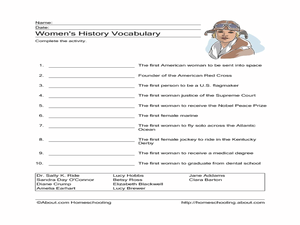

In [ ]:
import PIL.Image

img = PIL.Image.open('image.png')
img

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [ ]:
import PIL.Image

img = PIL.Image.open('image.gif')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  1. Sally Ride
> 2. Clara Barton
> 3. Betsy Ross
> 4. Sandra Day O'Connor
> 5. Amelia Earhart
> 6. Jane Addams
> 7. Lucy Stone
> 8. Elizabeth Blackwell
> 9. Mary Jenkins Surratt
> 10. Charlotte Perkins Gilman

In [ ]:
response = model.generate_content(["Make a educational quiz game from this image.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  Here is a quiz based on the image provided:
> 
> **Women's History Vocabulary**
> 
> **Name:**
> 
> **Date:**
> 
> **Instructions:** Complete the activity by filling in the blanks with the correct answers.
> 
> 1. The first American woman to be sent into space was _____________________.
> 2. The founder of the American Red Cross was _____________________.
> 3. The first person to be U.S. flag bearer was _____________________.
> 4. The first woman to serve on the Supreme Court was _____________________.
> 5. The first woman to receive the Nobel Peace Prize was _____________________.
> 6. The first female marine was _____________________.
> 7. The first woman to fly solo across the Atlantic Ocean was _____________________.
> 8. The first woman to ride a motorcycle across the Kentucky Ocean was _____________________.
> 9. The first woman to receive a medical degree was _____________________.
> 10. The first woman to graduate from dental school was _____________________.
> 
> **Answers:**
> 
> 1. Sally Ride
> 2. Clara Barton
> 3. Betsy Ross
> 4. Sandra Day O'Connor
> 5. Jane Addams
> 6. Opha May Johnson
> 7. Amelia Earhart
> 8. Annie Cohen Kopchovsky
> 9. Elizabeth Blackwell
> 10. Lucy Hobbs Taylor

# Chatbox safety settings

In [ ]:
response = model.generate_content('[Can you say a bad word?]')
response.candidates

In [ ]:
response.prompt_feedback

In [ ]:
response = model.generate_content('[Can you say a bad word?]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I'm sorry, I'm not supposed to generate responses that are inappropriate or offensive in nature. Would you like me to try generating something different?"

# Generative configurations

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [ ]:
model.count_tokens(chat.history)

total_tokens: 2716

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

>  Here is a quiz based on the image provided:
> 
> **Questions:**
> 
> 1. Who was the first American woman to be sent into space?
> 
> 
> 2. Who was the founder of the American Red Cross?
> 
> 
> 3. Who was the first person to be U.S. flag bearer?
> 
> 
> 4. Who was the first woman to serve on the Supreme Court?
> 
> 
> 5. Who was the first woman to receive the Nobel Peace Prize?
> 
> 
> 6. Who was the first female marine?
> 
> 
> 7. Who was the first woman to fly solo across the Atlantic Ocean?
> 
> 
> 8. Who was the first woman to ride a motorcycle across the Kentucky Ocean?
> 
> 
> 9. Who was the first woman to receive a medical degree?
> 
> 
> 10. Who was the first woman to graduate from dental school?
> 
> 
> **Answers:**
> 
> 1. Sally Ride
> 2. Clara Barton
> 3. Betsy Ross
> 4. Sandra Day O'Connor
> 5. Jane Addams
> 6. Opha May Johnson
> 7. Amelia Earhart
> 8. Effie Hotchkiss
> 9. Elizabeth Blackwell
> 10. Lucy Hobbs

# Embeddings

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [ ]:
response.candidates[0].content

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.014880341, -0.05473193, -0.016474485, -0.009896 ... TRIMMED ...


In [ ]:
chat.history

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

# Encoded messages

In [ ]:
import google.ai.generativelanguage as glm

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Make a educational quiz game from this image."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/png',
                    data=pathlib.Path('image.png').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Here is a quiz based on the image provided:
> 
> **Questions:**
> 
> 1. Who was the first American woman to... [TRIMMED] ...